#Adding Required Libraries

In [ ]:
!pip install matplotlib --upgrade

In [ ]:
!pip install tensorflow --upgrade

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Upload Data Set

In [ ]:
train = pd.read_csv("COVID19_train_N2_S5.csv",encoding='ISO-8859-1')
test = pd.read_csv("COVID19_test_N2_S5.csv",encoding='ISO-8859-1')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41157 non-null  object
 1   Sentiment      41157 non-null  object
dtypes: object(2)
memory usage: 643.2+ KB


In [ ]:
train.head()

,OriginalTweet,Sentiment
0,<user> <user> <user> <url> and <url> and <url>,Neutral
1,advice talk to your neighbours family to excha...,Positive
2,coronavirus australia : woolworths to give eld...,Positive
3,my food stock is not the only one which is emp...,Positive
4,"me , ready to go at supermarket during the <ha...",Extremely Negative


#Cleaning Data Set

##Deleting Nan Rows

In [ ]:
train.isnull().sum(axis = 0)

OriginalTweet    0
Sentiment        0
dtype: int64

In [ ]:
test.isnull().sum(axis = 0)

OriginalTweet    0
Sentiment        0
dtype: int64

In [ ]:
#train.dropna(subset = ["OriginalTweet"],inplace= True)

Before cleaning the Dataset, let's perform a normalization process that we forgot about. Also some tweets have multiple question marks we should normalize this tweets too.

##Normalizing non-ascii characters

In [ ]:
def remove_non_ascii(tweet):
    return "".join(c for c in tweet if ord(c)<128)

In [ ]:
tweet = "covid-19 wonÃ¢Â’t be similar to the great recession unless unemployment ?? amp; stays ??. at the eod, if the gov steps up for the consumer amp; business, people will still have income. if itÃ¢Â’s necessary to curb activity to beat covid-19, a (temp) gdp retraction shouldnÃ¢Â’t be a surprise."
print("Tweet Before\n",tweet)
tweet = remove_non_ascii(tweet)
print("Tweet After\n",tweet)

Tweet Before
 covid-19 wonÃ¢Â’t be similar to the great recession unless unemployment ?? amp; stays ??. at the eod, if the gov steps up for the consumer amp; business, people will still have income. if itÃ¢Â’s necessary to curb activity to beat covid-19, a (temp) gdp retraction shouldnÃ¢Â’t be a surprise.
Tweet After
 covid-19 wont be similar to the great recession unless unemployment ?? amp; stays ??. at the eod, if the gov steps up for the consumer amp; business, people will still have income. if its necessary to curb activity to beat covid-19, a (temp) gdp retraction shouldnt be a surprise.


In [ ]:
def remove_mult_QM(tweet):
  if tweet.count('?') > 5:
    return tweet.replace('?','')
  else:
    return tweet

In [ ]:
tweet = "join us for brunel's second public webinar on thursday 02 april, 11am. presented by ?? ????????? ?????, we explore '???????? ??????, ????? ??? ???????????' register here ??"
print("Tweet Before\n",tweet)
tweet = remove_mult_QM(tweet)
print("Tweet After\n",tweet)

Tweet Before
 join us for brunel's second public webinar on thursday 02 april, 11am. presented by ?? ????????? ?????, we explore '???????? ??????, ????? ??? ???????????' register here ??
Tweet After
 join us for brunel's second public webinar on thursday 02 april, 11am. presented by   , we explore ' ,   ' register here 


In [ ]:
def remove_mult_spaces(tweet):
#Some tweets consist of only ?. That is why the try except structure was used.
  try:
    return re.sub("\s\s+" , " ", tweet)
  except:
    return tweet

In [ ]:
def normalize(tweet):
  tweet = remove_non_ascii(tweet)
  tweet = remove_mult_QM(tweet)
  tweet = remove_mult_spaces(tweet)
  return tweet

In [ ]:
tweet = "This is a test tweet ???????"
print("Tweet Before\n",tweet)
tweet = normalize(tweet)
print("Tweet After\n",tweet)

Tweet Before
 This is a test tweet ???????
Tweet After
 This is a test tweet 


In [ ]:
for i in range(len(train)):
  train.iloc[i]["OriginalTweet"] = normalize(train.iloc[i]["OriginalTweet"])

In [ ]:
for i in range(len(test)):
  test.iloc[i]["OriginalTweet"] = normalize(test.iloc[i]["OriginalTweet"])

## Tweet Lenghts

In [ ]:
train_lens = []
for tweet in train["OriginalTweet"]:
  tweet_len = len(tweet.split())
  train_lens.append(tweet_len)
train["tweet_len"] = train_lens

In [ ]:
test_lens = []
for tweet in test["OriginalTweet"]:
  tweet_len = len(tweet.split())
  test_lens.append(tweet_len)
test["tweet_len"] = test_lens

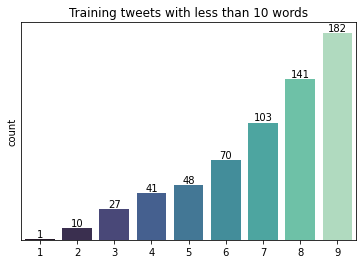

In [ ]:
ax = sns.countplot(x='tweet_len',data=train[train['tweet_len']<10], palette='mako')
plt.title('Training tweets with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

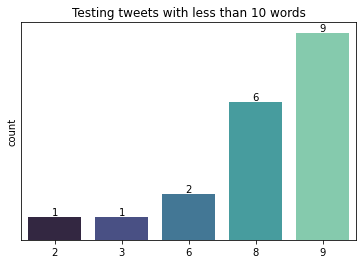

In [ ]:
ax = sns.countplot(x='tweet_len',data=test[test['tweet_len']<10], palette='mako')
plt.title('Testing tweets with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [ ]:
data=train[train['tweet_len']<4]
data.head(len(data))

,OriginalTweet,Sentiment,tweet_len
9073,stop fucking hoarding,Negative,3
9163,reality check indeed,Neutral,3
9167,meanwhile at home,Neutral,3
9776,be like bob,Positive,3
12047,only in france,Neutral,3
12399,seems about right,Neutral,3
12716,stay safe everyone,Positive,3
13843,. <url>,Neutral,2
15124,toilet paper anyone,Neutral,3
15477,supermarkets right now,Neutral,3


In [ ]:
train = train[train["tweet_len"]>4]

In [ ]:
data=test[test['tweet_len']<4]
data.head(len(data))

,OriginalTweet,Sentiment,tweet_len
2208,good morning <url>,Positive,3
3368,selfish wankpuffins,Negative,2


In [ ]:
test = test[test["tweet_len"]>4]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41078 entries, 0 to 41156
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41078 non-null  object
 1   Sentiment      41078 non-null  object
 2   tweet_len      41078 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


#BERT

##Adding Required Libraries

In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizerFast
from transformers import TFBertModel

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
from tensorflow import keras

import numpy as np

import re,string

##Tokenizing

In [ ]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [ ]:
train_token_lens = []
total = 0
for i,tweet in enumerate(train["OriginalTweet"].values):
    tokens = tokenizer.encode(tweet, max_length=512, truncation=True)
    train_token_lens.append(len(tokens))
    if len(tokens)>250:
        print(f"INDEX: {i}, TOKEN: {len(tokens)}, TEXT:\n{tweet}")
        total += 1
print("Total of tweets: ",total)

INDEX: 22, TOKEN: 297, TEXT:
we have <allcaps> amazing cheap deals </allcaps> ! <allcaps> for the </allcaps> <hashtag> covid 2019 </hashtag> going on to help you ? ? ? <hashtag> trials </hashtag> <hashtag> monthly </hashtag> <hashtag> yearly </hashtag> and resonable <hashtag> prices </hashtag> / <hashtag> subscriptions </hashtag> just <allcaps> dm us </allcaps> ! <hashtag> best iptv </hashtag> <hashtag> iptv </hashtag> <hashtag> service </hashtag> <hashtag> iptv </hashtag> <hashtag> iptv deals </hashtag> <hashtag> cheap </hashtag> <hashtag> ip tv </hashtag> <hashtag> football </hashtag> <hashtag> hd </hashtag> <hashtag> movies </hashtag> <hashtag> adult </hashtag> <hashtag> cinema </hashtag> <hashtag> hot movies </hashtag> <hashtag> iptv new </hashtag> <hashtag> iptv2020 </hashtag> <hashtag> adult </hashtag>
INDEX: 23, TOKEN: 288, TEXT:
we have <allcaps> amazing cheap deals </allcaps> ! <allcaps> for the </allcaps> <hashtag> covid 2019 </hashtag> going on to help you ? ? ? <hashtag> tr

In [ ]:
train["Token_lens"] = train_token_lens

In [ ]:
train = train[train["Token_lens"]<250]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41026 entries, 0 to 41156
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41026 non-null  object
 1   Sentiment      41026 non-null  object
 2   tweet_len      41026 non-null  int64 
 3   Token_lens     41026 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.6+ MB


In [ ]:
test_token_lens = []
total = 0
for i,tweet in enumerate(test["OriginalTweet"].values):
    tokens = tokenizer.encode(tweet, max_length=512, truncation=True)
    test_token_lens.append(len(tokens))
    if len(tokens)>250:
        print(f"INDEX: {i}, TOKEN: {len(tokens)}, TEXT: {tweet}")
        total += 1
print("Total of tweets: ",total)

Total of tweets:  0


In [ ]:
test["Token_lens"] = test_token_lens

In [ ]:
test = test[test["Token_lens"]<250]

In [ ]:
train = train.sort_values(by = "Token_lens",ascending=False)
train.head(20)

,OriginalTweet,Sentiment,tweet_len,Token_lens
18411,the various levels of filth <url> <hashtag> co...,Neutral,80,249
10205,<number> more cases of mres have just arrived ...,Positive,88,249
18413,not living above your means <url> <hashtag> co...,Neutral,79,247
24783,<hashtag> covid </hashtag> ? <number> protecti...,Neutral,83,246
11466,many common <hashtag> household </hashtag> <ha...,Neutral,81,246
35092,our little plague doctor friend has arrived to...,Extremely Positive,83,245
4045,"today at the grocery store . yep , this really...",Positive,87,245
34867,when you are out of toilet paper and need to b...,Positive,92,244
23461,<user> ji <allcaps> gods </allcaps> + <allcaps...,Extremely Negative,76,244
24398,"? new podcast ! "" businesses answering the <al...",Positive,80,244


In [ ]:
#train = train.iloc[8:]

In [ ]:
train = train.sample(frac=1).reset_index(drop=True)

In [ ]:
test = test.sort_values(by = "Token_lens",ascending=False)
test.head(20)

,OriginalTweet,Sentiment,tweet_len,Token_lens
2885,<hashtag> covid </hashtag> ? <number> ? face m...,Neutral,85,242
1421,<allcaps> this </allcaps> <hashtag> coronoviru...,Negative,91,232
1460,<hashtag> covid 19 </hashtag> <number> protect...,Neutral,82,228
709,<allcaps> nyc </allcaps> water . <allcaps> is ...,Extremely Negative,93,226
1384,<hashtag> covid 19 </hashtag> protection face ...,Neutral,81,225
3738,<number> weeks <hashtag> lockdown </hashtag> !...,Neutral,75,207
706,this panel by sid teles perfectly embodies the...,Extremely Positive,69,205
1015,<user> <user> this = as bad for the ? as the p...,Extremely Negative,84,202
2466,<hashtag> ohio coronavirus </hashtag> <hashtag...,Neutral,71,201
2995,. <user> says it is out of <hashtag> stock </h...,Negative,70,201


In [ ]:
test = test.sample(frac=1).reset_index(drop=True)

##Train - Validation - Test Split

In [ ]:
X = train['OriginalTweet'].values
y = train['Sentiment'].values

In [ ]:
seed = 42
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y, random_state=seed)

In [ ]:
X_test = test['OriginalTweet'].values
y_test = test['Sentiment'].values

##Label Encoding

In [ ]:
def label_encoding(data):
  label = preprocessing.LabelEncoder()
  y = label.fit_transform(data)
  y = to_categorical(y)
  return y

In [ ]:
y_valid = label_encoding(y_valid)
y_test = label_encoding(y_test)
y_train = label_encoding(y_train)

In [ ]:
y_test

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]], dtype=float32)

##Sentiment Analysis

In [ ]:
MAX_LEN=256

In [ ]:
def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [ ]:
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(X_valid, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

##Modeling

In [ ]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
def create_model(bert_model, max_len=MAX_LEN):
    
    ##params###
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-7)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()


    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    embeddings = bert_model([input_ids,attention_masks])[1]
    
    output = tf.keras.layers.Dense(5, activation="softmax")(embeddings)
    
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)
    
    model.compile(opt, loss=loss, metrics=accuracy)
    
    
    return model

In [ ]:
model = create_model(bert_model, MAX_LEN)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 256)]        0           []                               
                                                                                                  
 tf_bert_model_1 (TFBertModel)  TFBaseModelOutputWi  109482240   ['input_3[0][0]',                
                                thPoolingAndCrossAt               'input_4[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 256,                                         

In [ ]:
history_bert = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=4, batch_size=16)

Epoch 1/4
2308/2308 [==============================] - 3695s 2s/step - loss: 0.8683 - categorical_accuracy: 0.6480 - val_loss: 0.5771 - val_categorical_accuracy: 0.7833
Epoch 2/4
2308/2308 [==============================] - 3670s 2s/step - loss: 0.4581 - categorical_accuracy: 0.8321 - val_loss: 0.4117 - val_categorical_accuracy: 0.8489
Epoch 3/4
2308/2308 [==============================] - 3669s 2s/step - loss: 0.3219 - categorical_accuracy: 0.8857 - val_loss: 0.4176 - val_categorical_accuracy: 0.8455
Epoch 4/4
2308/2308 [==============================] - 3669s 2s/step - loss: 0.2358 - categorical_accuracy: 0.9168 - val_loss: 0.3920 - val_categorical_accuracy: 0.8601


#BERT Results

In [ ]:
result_bert = model.predict([test_input_ids,test_attention_masks])

In [ ]:
y_pred_bert =  np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1

In [ ]:
def conf_matrix(y, y_pred, title):
    fig, ax =plt.subplots(figsize=(15,15))
    labels=['Extremly Negative','Negative', 'Neutral', 'Positive','Extremly Positive']
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":25})
    plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=17) 
    ax.yaxis.set_ticklabels(labels, fontsize=17)
    ax.set_ylabel('Test', fontsize=20)
    ax.set_xlabel('Predicted', fontsize=20)
    plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

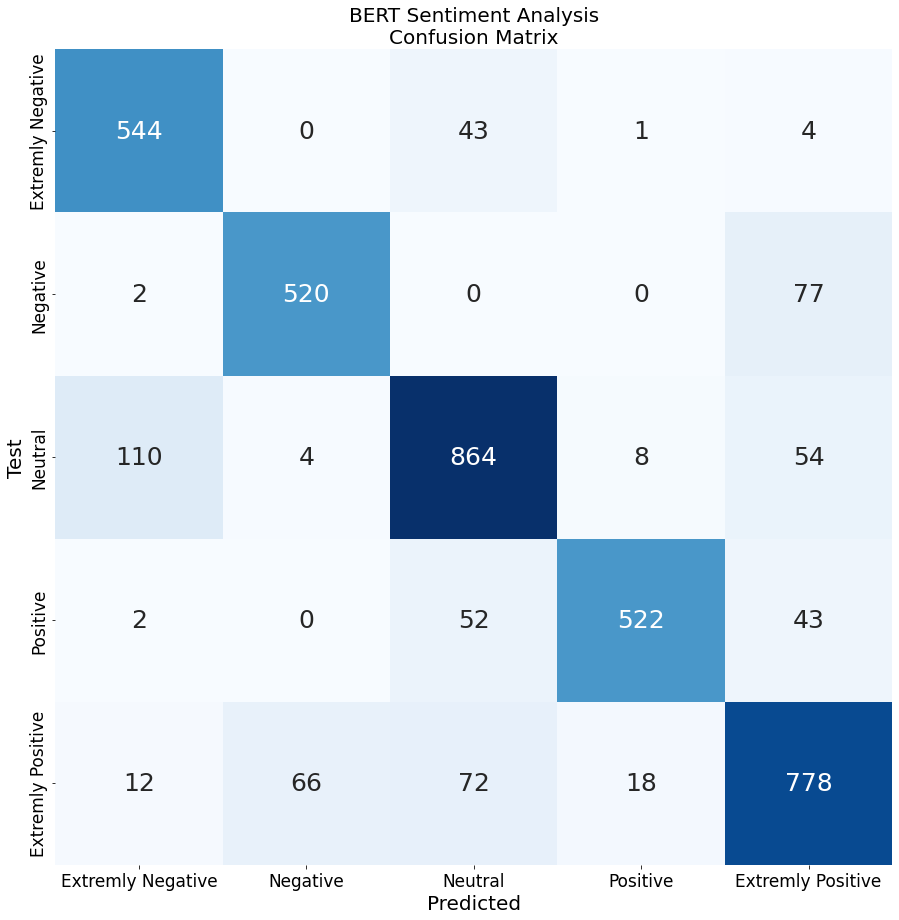

In [ ]:
conf_matrix(y_test.argmax(1), y_pred_bert.argmax(1),'BERT Sentiment Analysis\nConfusion Matrix')

In [ ]:
print('\tClassification Report for BERT:\n\n',classification_report(y_test,y_pred_bert, target_names=['Extremely Negative','Negative', 'Neutral', 'Positive','Extremely Positive']))

	Classification Report for BERT:

                     precision    recall  f1-score   support

Extremely Negative       0.81      0.92      0.86       592
          Negative       0.88      0.87      0.87       599
           Neutral       0.84      0.83      0.83      1040
          Positive       0.95      0.84      0.89       619
Extremely Positive       0.81      0.82      0.82       946

         micro avg       0.85      0.85      0.85      3796
         macro avg       0.86      0.86      0.86      3796
      weighted avg       0.85      0.85      0.85      3796
       samples avg       0.85      0.85      0.85      3796

